<a href="https://colab.research.google.com/github/ryotoitoi/time_series_analysis/blob/main/notebook/time_series_tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Time series analysis tutorial

時系列解析は完全に素人なのである程度は知っておきたい

個人的にいい具合まで進めたらkaggleの時系列でもやってみるつもり

---
## References
- https://www.i-juse.co.jp/statistics/jirei/sympo/10/arima-model.html
- https://tjo.hatenablog.com/entry/2013/07/12/184704
- https://to-kei.net/time-series-analysis/time-series-analysis-stat/
- https://www.atmarkit.co.jp/ait/articles/1406/30/news005.html
- https://qiita.com/TomokIshii/items/b3ebe2b60c5d3d5a0d5a
---

---

## Preface
時系列データは，通常，時間軸上で等間隔に観測される系列的なデータ群をいう．そのため，各観測値は独立であるという通常の統計解析における仮定が成立しないので，これらの時間軸上の構造的あるいは周期的変動を考慮した特有な分析手法が必要になる．


| 略 | モデル  |
|  ---       |     ---      | 
| AR	| 自己回帰（Auto Regression）モデル| 
| MA	| 移動平均（Moving Average）モデル| 
| ARMA	| 自己回帰移動平均モデル| 
| ARIMA| 	自己回帰和分移動平均モデル| 
| ECT	| 誤差修正自己回帰モデル| 
| ARCH	| 分散自己回帰モデル| 
| GARCH	| 一般化分散自己回帰モデル| 
| SV	| 確率的ボラティリティモデル（Stochastic Volatility）| 
| MSM	| マルコフスイッチングモデル（Markov Switching Model）| 
| MSM	| マルコフスイッチングマルチフラクタル（Markov Switching Multifractal）| 


---
## Prerequisites

- ラグ

ある時点を基準にしたときの時間のズレのこと    
$j$次ラグは$y_t$に対し$y_{t−j}$といった形で表現される

- 確率過程

$y_1, y_2, y_3, \cdots$といった形の時間とともに変化する確率変数

- 自己共分散

自己共分散は現在と、ある時点前の過去のデータとの間の共分散

$k$次の自己共分散は以下のように表される

$$ {\operatorname{Cov}\left(y_{t}, y_{t-k}\right)=E\left[\left(y_{t}-\mu_{t}\right)\left(y_{t-k}-\mu_{t-k}\right)\right]=\gamma_{kt}} $$

- 自己相関

$j$時点前のデータに対してどれだけ相関があるかを意味する

$$
p_{j t}=\frac{\operatorname{Cov}\left(y_{t}, y_{t-j}\right)}{\sqrt{V\left(y_{t}\right) V\left(y_{t-j}\right)}}
$$

定常性が仮定されるとき、$j$次の自己相関は$p_j$と表される

- 偏自己相関

ある時点同士だけの関係性。偏相関と同じ

---

---
## 定常性とホワイトノイズ

- 定常性

平たくいえば「時間が経っても全体で見ればその時系列は変わらない」という性質


定常性は同時分布や基本統計量の時間不変性に関するものであり、何を不変とするかによって
1. 弱定常性
2. 強定常性

の2つに分かれる

弱定常性は過程の期待値と自己共分散が時間を通じて一定であるというもの

任意のtとkに対して、
$$
\begin{array}{l}{E\left(y_{t}\right)=\mu} \\ 
{\operatorname{Cov}\left(y_{t}, y_{t-k}\right)=E\left[\left(y_{t}-\mu\right)\left(y_{t-k}-\mu\right)\right]=\gamma_{k}}\end{array}
$$
が成立する場合、過程は弱定常といわれる

一方、強定常性は同時分布が不変であるというもの

任意のtとkに対して、
$$
\left(y_{t}, y_{t+1}, \cdots, y_{t+k}\right)^{\prime}
$$
の同時分布が同一である場合、過程は強定常といわれる

ただし同時分布が多変量正規分布の場合は正規過程と呼ばれ、弱定常性と強定常性が同値になる

**しかし**   
あいにく、定常性が成立することは多くない、そういったデータは対数変換などの処理がなされる

- ホワイトノイズ

一般線形回帰を知ってるなら話は早い、それでいう誤差$\epsilon$のようなもの

任意の$t\neq 0, j\in\mathbb{Z}_+$に対して
$$
\begin{array}{l}{E\left(\varepsilon_{t}\right)=0, \operatorname{Var}\left(\varepsilon_{t}\right)=\sigma^{2}} \\ {\gamma_{j}=\operatorname{Cov}\left(\varepsilon_{t}, \varepsilon_{t-j}\right)=0}\end{array}
$$

が成立するとき、$\epsilon_t$はホワイトノイズである.時系列モデルにおいてバラツキを表すホワイトノイズを攪乱項とよぶ

また、定義より、ホワイトノイズは定常性を満たす

---



In [ ]:
# https://machinelearningmastery.com/white-noise-time-series-python/

from random import gauss
from random import seed
from pandas import Series
from pandas.tools.plotting import autocorrelation_plot

seed(1)

series = [gauss(0.0, 1.0) for i in range(1000)]
series = Series(series)

series.describe()

count    1000.000000
mean       -0.013222
std         1.003685
min        -2.961214
25%        -0.684192
50%        -0.010934
75%         0.703915
max         2.737260
dtype: float64

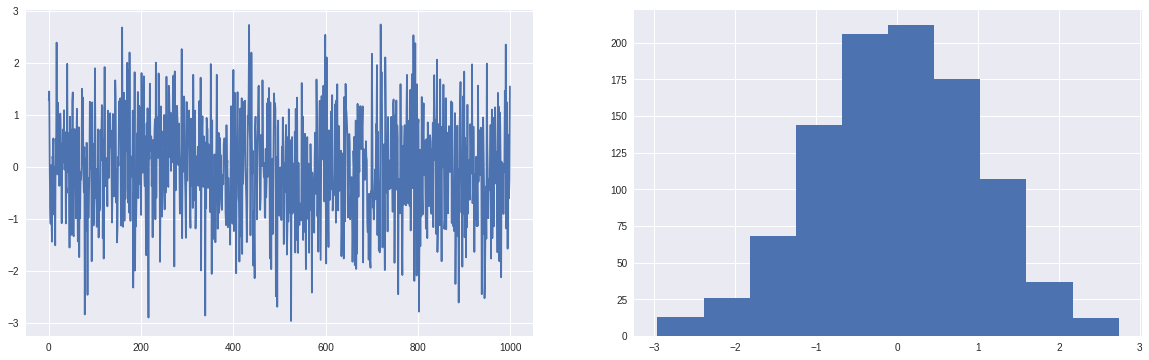

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 6))

plt.subplot(1,2,1)
series.plot()

plt.subplot(1,2,2)
series.hist()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: 'pandas.tools.plotting.autocorrelation_plot' is deprecated, import 'pandas.plotting.autocorrelation_plot' instead.
  """Entry point for launching an IPython kernel.


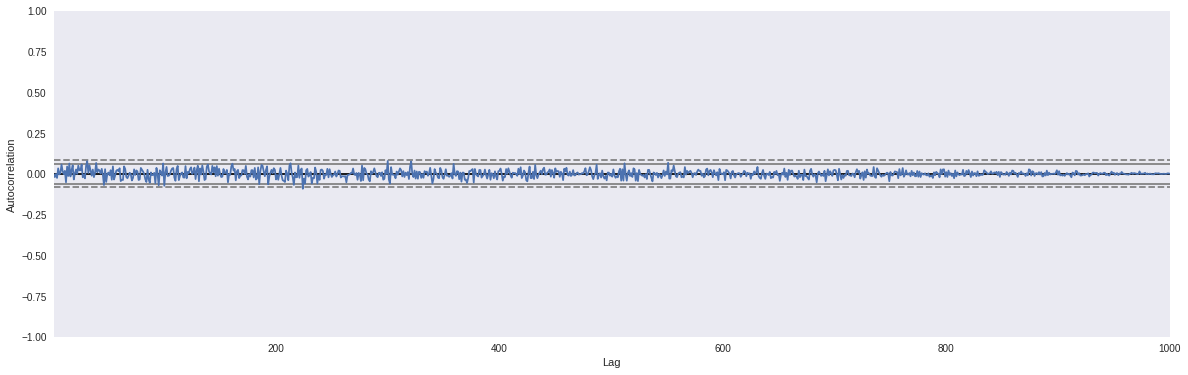

In [ ]:
autocorrelation_plot(series)
# ラインは信頼区間[95%から99%]

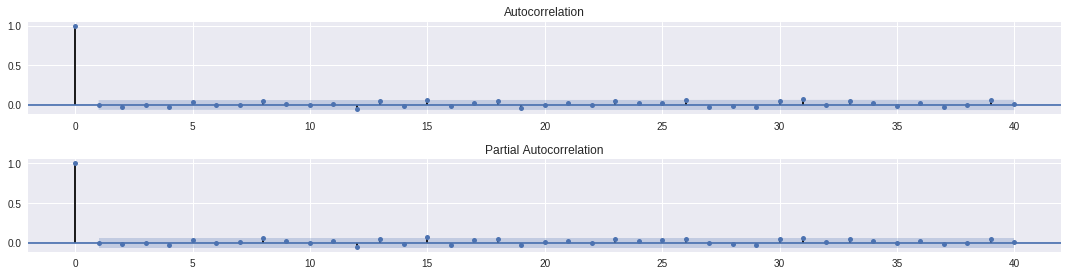

In [ ]:
import statsmodels.api as sm

# コレログラム

# selfcorr = sm.tsa.stattools.acf(series, nlags=40)

fig = plt.figure(figsize=(15, 4))

ax1 = fig.add_subplot(211)

sm.graphics.tsa.plot_acf(series, lags=40, ax=ax1)

ax2 = fig.add_subplot(212)

sm.graphics.tsa.plot_pacf(series, lags=40, ax=ax2)

plt.tight_layout()

---

# モデルについて

---
## Auto Regressive

$$
y_{t}=\varphi_{1} y_{t-1}+\varphi_{2} y_{t-2}+\cdots+\varphi_{p} y_{t-y}+\varepsilon_{t}
$$



$y_t$は$p$次の自己回帰過程或はAR過程と呼ばれる

上式を$p$次の自己回帰モデルあるいはARモデルという,

$\varepsilon_{t}$はホワイトノイズ



---

/usr/local/lib/python3.6/dist-packages/pandas/core/series.py:2890: FutureWarning: from_csv is deprecated. Please use read_csv(...) instead. Note that some of the default arguments are different, so please refer to the documentation for from_csv when changing your function calls
  infer_datetime_format=infer_datetime_format)


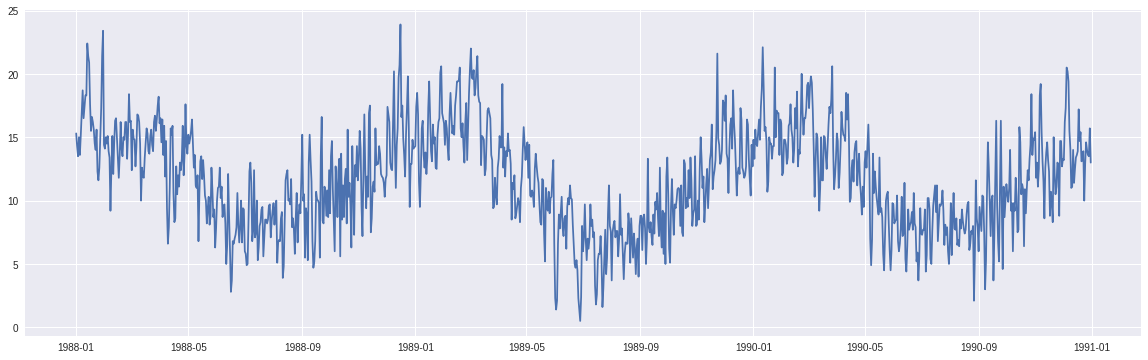

In [ ]:
from pylab import rcParams
rcParams['figure.figsize'] = 20,6

url ='https://raw.githubusercontent.com/upul/WhiteBoard/master/data/melbourne_temperature_test.csv'
  
from statsmodels.tsa.ar_model import AR
from sklearn.metrics import mean_squared_error

series = Series.from_csv(url, header=0)

plt.plot(series)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: 'pandas.tools.plotting.autocorrelation_plot' is deprecated, import 'pandas.plotting.autocorrelation_plot' instead.
  """Entry point for launching an IPython kernel.


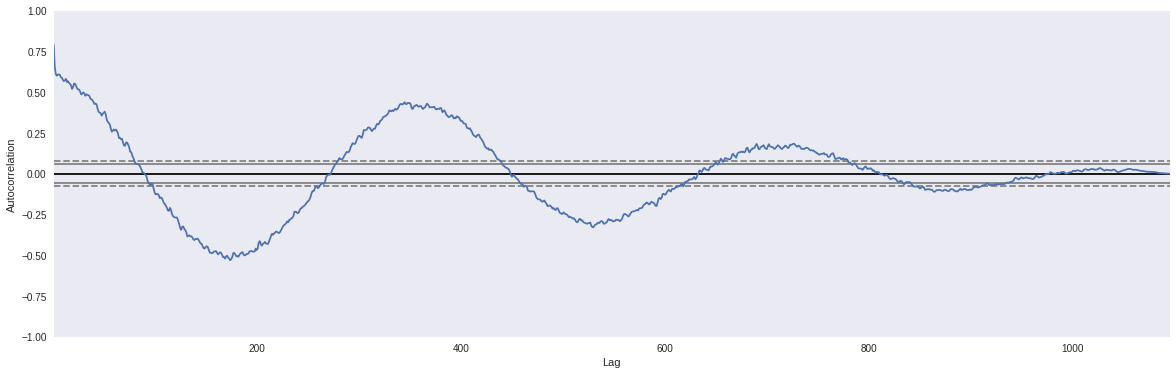

In [ ]:
autocorrelation_plot(series)

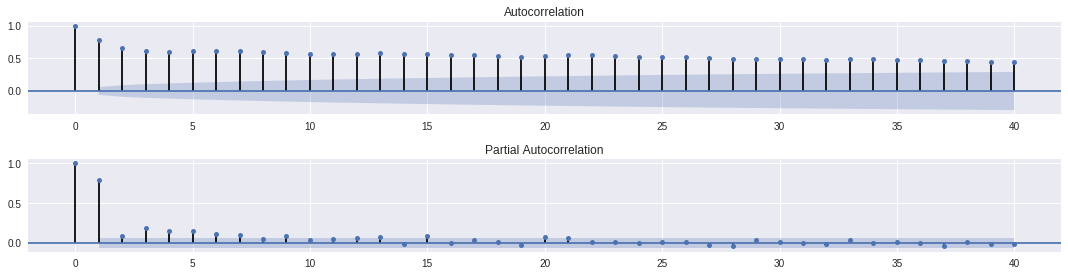

In [ ]:
fig = plt.figure(figsize=(15, 4))

ax1 = fig.add_subplot(211)

sm.graphics.tsa.plot_acf(series, lags=40, ax=ax1)

ax2 = fig.add_subplot(212)

sm.graphics.tsa.plot_pacf(series, lags=40, ax=ax2)

plt.tight_layout()

Test MSE: 7.598


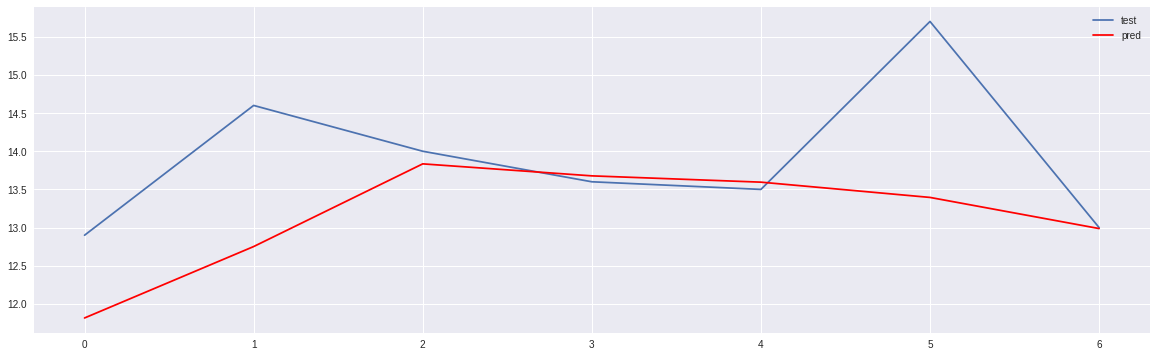

In [ ]:
# https://ja.wikipedia.org/wiki/赤池情報量規準

X = series.values
train, test = X[1:len(X)-7], X[len(X)-7:]

model = AR(train)
model_fit = model.fit(ic='aic')
# print('Lag: %s' % model_fit.k_ar)
# print('Coefficients: %s' % model_fit.params)

predictions = model_fit.predict(start=len(train), end=len(train)+len(test)-1, dynamic=False)

# for i in range(len(predictions)):
# 	print('predicted=%f, expected=%f' % (predictions[i], test[i]))
# error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)

plt.plot(test, label='test')
plt.plot(predictions, color='red', label='pred')

plt.legend()

---
## Moving Average

$$
y_{t}=\varepsilon_{t}-\theta_{1} \varepsilon_{t-1}-\theta_{2} E_{t-2}-\cdots-\theta_{q} E_{q}
$$

$\epsilon_t$はホワイトノイズである．上式を$q$次のMAモデル或は移動平均モデルという．


---

/usr/local/lib/python3.6/dist-packages/pandas/core/series.py:2890: FutureWarning: from_csv is deprecated. Please use read_csv(...) instead. Note that some of the default arguments are different, so please refer to the documentation for from_csv when changing your function calls
  infer_datetime_format=infer_datetime_format)


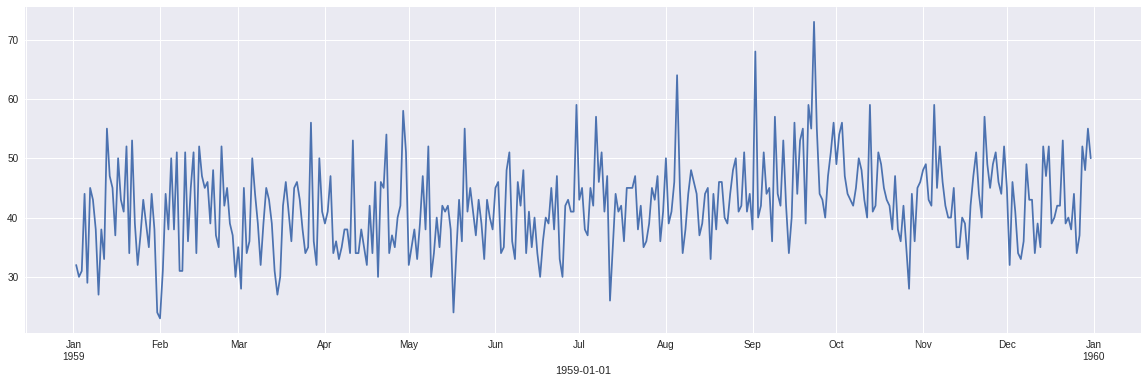

In [ ]:
# https://machinelearningmastery.com/moving-average-smoothing-for-time-series-forecasting-python/

# from pylab import rcParams
# rcParams['figure.figsize'] = 20,6

series = Series.from_csv('https://raw.githubusercontent.com/jbrownlee/Datasets/master/daily-total-female-births.csv', header=1)
series.plot()

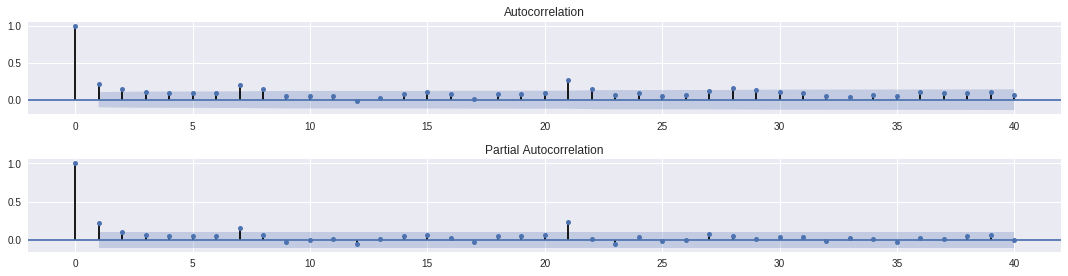

In [ ]:
fig = plt.figure(figsize=(15, 4))

ax1 = fig.add_subplot(211)

sm.graphics.tsa.plot_acf(series, lags=40, ax=ax1)

ax2 = fig.add_subplot(212)

sm.graphics.tsa.plot_pacf(series, lags=40, ax=ax2)

plt.tight_layout()

The rolling() function on the Series Pandas object will automatically group observations into a window. You can specify the window size, and by default a trailing window is created. Once the window is created, we can take the mean value, and this is our transformed dataset.

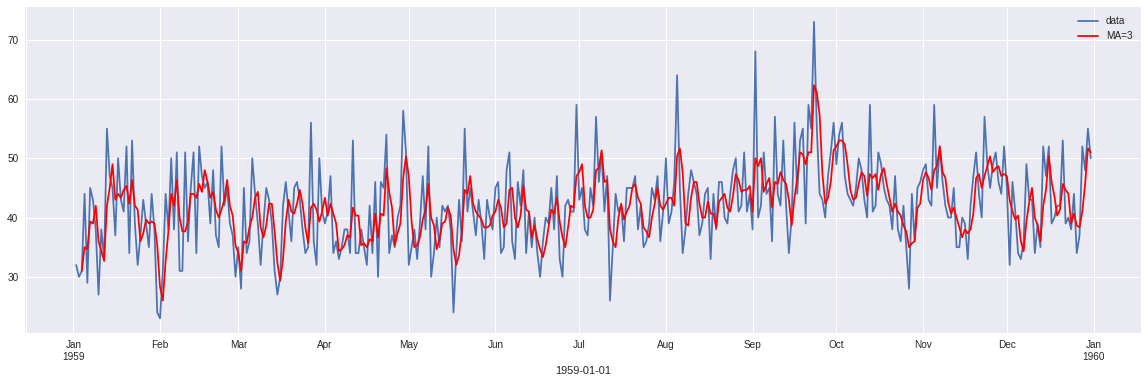

In [ ]:
rolling = series.rolling(window=3)
rolling_mean = rolling.mean()

series.plot(label='data')
rolling_mean.plot(color='red', label='MA=3')

plt.legend()

---
## Autoregressive and Moving Average

$p$次の自己回帰過程において，残差$\epsilon_t$が$q$次の移動平均過程であるとき，$y_t$は

$$
\begin{array}{l}{y_{t}=c+\phi_{1} y_{t-1}+\cdots+\phi_{p} y_{t-p}+\epsilon_{t}+\theta_{1} \epsilon_{t-1}+\cdots+\theta_{q} \epsilon_{t-q}} \\ {\epsilon_{t} \sim W \cdot N .\left(\sigma^{2}\right)}\end{array}
$$

これを次数$(p，q)$の自己回帰移動平均過程あるいはARMA過程と呼び，ARMA$(p，q)$と表す．

$q$をゼロとしたときはARモデル，また$p$をゼロとしたときはMAモデルとなり，ARMAモデルはARモデルやMAモデルより一般的なモデルとなる．

本来定常AR過程と定常MA過程の足し算なので、全体としては通常ならARMAモデルは定常な時系列過程となる


---

## パラメータとモデルの選び方

偏自己相関プロットから$p$の値を、自己相関プロットから$q$の値を類推する

- 相関の高いものを選ぶ

そして、いくつかのモデルの候補が出れば情報量を計算して最適なモデルを選ぶ


最適なモデルの選択の評価基準として一般的によく用いられるのが
- 赤池情報量規準（AIC：An Information Criterion、のちにAkaike's Information Criterion）
- ベイズ情報基準（BIC：Bayesian Information Criterion , SIC : Schwarz Information Criterion）

## 情報量について


話し始めると超絶長くなる気がしたから今回はリンクを貼ってまた記事書きます


- https://www.google.com/url?sa=t&rct=j&q=&esrc=s&source=web&cd=5&ved=2ahUKEwigr9Xgu5DhAhWUFYgKHQjeBFMQFjAEegQIBRAB&url=http%3A%2F%2Fd.hatena.ne.jp%2Fhiroyukikojima%2F20140430%2F1398842765&usg=AOvVaw0gD6VfmWDxgxhokRNIje1k
- http://matuisi.main.jp/wp-content/uploads/2013/05/AIC.pdf
- https://www.phys.chuo-u.ac.jp/public/tag/kougi/2004/toukei/presen6.pdf

---

- https://blog.albert2005.co.jp/2016/04/19/ベイズ情報量規準及びその発展-～概説編～/
- http://gcoe.ier.hit-u.ac.jp/vox/017.html
- https://ameblo.jp/yusaku-ohkubo/entry-12257909424.html

In [ ]:
# http://ytaishiro.hatenablog.com/entry/2018/01/25/053815

from statsmodels.tsa import stattools as st

# 上のライブラリでARMAの字数が決定される、情報量としてここれはaicを用いた。
# bicなどもあり、これらについてはまた別の機会に触れる予定
# http://www.orsj.or.jp/~archive/pdf/bul/Vol.41_07_375.pdf

from statsmodels.tsa.arima_model import ARMA

info_criteria = st.arma_order_select_ic(train, ic=['aic', 'bic'])

print(info_criteria.aic_min_order)
print(info_criteria.bic_min_order)

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:646: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:650: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  elif issubdtype(paramsdtype, complex):
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


(3, 1)
(3, 1)


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:646: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):


ARMA(3,1): AIC = 4893.13


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:650: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  elif issubdtype(paramsdtype, complex):
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:577: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):


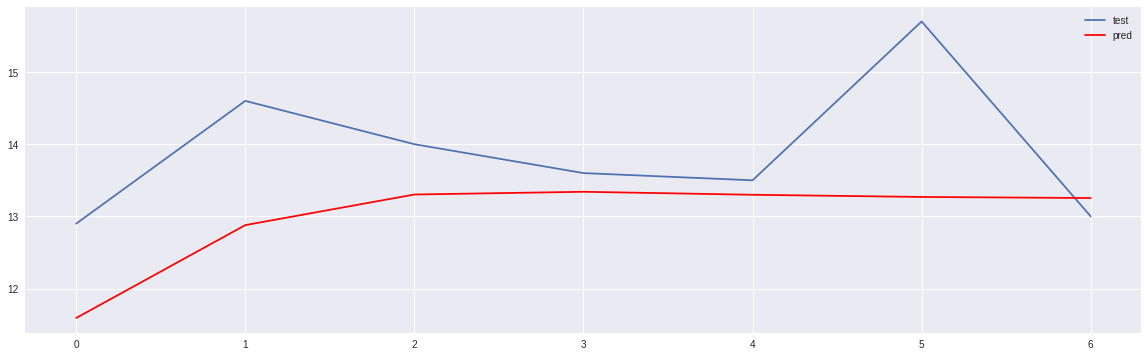

In [ ]:
model = ARMA(train, order=[3, 1])

# このmaxlagというものがよくわからない、ちなみになしで実行するとエラーが出た
model_fit = model.fit(maxlags=7, ic='aic')

print('ARMA(3,1): AIC = %.2f' % model_fit.aic)


predictions = model_fit.predict(start=len(train), end=len(train)+len(test)-1, dynamic=False)

plt.plot(test, label='test')
plt.plot(predictions, color='red', label='pred')

plt.legend()

## Autoregressive, Integrated and Moving Average

ARIMAモデルはBox ＆ Jenkins（1976）によって最初に導出された．

モデルには，3つのタイプパラメータ
- 自己回帰パラメータ(p)
- 差分の階数(d)
- 移動平均パラメータ(q) 

が含まれる．


時系列データの分析において，多くの場合，時系列の統計的な性質が時間の推移によって変化しない定常過程を前提として分析が行われる．

>平均値，分散が観測時刻によらず一定値である時系列データである．そのため，非定常な時系列データに対しては，事前に差分変換，対数変換，平方根変換などの変換処理を行うことによって，定常化することはよく行われる．


ARIMAモデルは非定常過程に対する時系列モデルである．上で述べたように，ARMAモデルは定常な時系列過程を前提としてきた．

時系列において平均値が時間的に変動する場合(傾向変動が見受けられる場合など)は非常によく見受けられるものであり，それらに対して，ARMAモデルはそのままでは適用できない．

そのため，平均値揺動を取り除くために様々な方法が用いられるが，時系列の階差をとり，その階差時系列に対してARMAモデルを適用する．


1次階差時系列$x_t$は次のように算出される
$$
x_t = y_t - y_{t-1}
$$

同様に2次の階差時系列$z_t$は

$$
z_t = x_t - x_{t-1}  = (y_t - y_{t-1}) - (y_{t-1} - y_{t-2})
$$


一般に$d$階差の時系列$z_t$にARMAモデルに適用したものが，ARIMAモデルである．

ARMAモデルの場合と同様に，階差$d$の時系列を$p$次のAR，$q$次のMAモデルに適用したARIMAモデルをARIMA$(p，d，q)$と表す．


## ARIMAのパラメータの決め方
- https://machinelearningmastery.com/tune-arima-parameters-python/

In [ ]:
from statsmodels.tsa.arima_model import ARMA,ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX

# https://machinelearningmastery.com/tune-arima-parameters-python/